# Start

The first thing we have to do when reviewing the Traffic Count in Pittsburgh is entering the the .csv file. Once we do that we check the first 5 values to make sure we have imported the correct file.

In [21]:
#imports
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline

from matplotlib import pyplot as plt


# load data into data frame
df = pd.read_csv("traffic_data.csv")
df.head()


,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


Check for Null values

In [22]:
# Outputs a list of how many null values are in each column
df.isnull().sum()

id                              0
device_id                       0
record_oid                     45
count_start_date               53
count_end_date                 85
average_daily_car_traffic     134
average_daily_bike_traffic    413
counter_number                152
counter_type                   56
speed_limit                   159
max_speed                     329
median_speed                  122
percent_over_limit            179
speed85_percent               119
speed95_percent               129
longitude                       1
latitude                        1
neighborhood                    2
council_district                2
ward                            1
tract                           0
public_works_division           1
pli_division                    1
police_zone                     2
fire_zone                       1
dtype: int64

### Dealing with Null Values

Since there are some columns with hundreds of null values, the first thing we do is filter out all the columns we are not planning on using, leaving us with just the neighborhoods and the average traffic count. For this dataset, I chose to remove any rows after that containing null values since the cause of the null values was due to incomplete information gathering. Since the information was incomplete, it would be negligent to see them as a zero value, so removing them was the better option.

In [23]:
#Sort dataset into 2 specific columns and drop all null values as they are incomplete data
neighborhood = df[['neighborhood','average_daily_car_traffic']]
neighborhood= neighborhood.dropna()
neighborhood

,neighborhood,average_daily_car_traffic
0,Polish Hill,4949.0
3,Squirrel Hill South,2741.0
5,Central Northside,1046.0
7,Polish Hill,3015.0
10,Squirrel Hill South,5592.0
...,...,...
402,Greenfield,5605.0
404,Central Northside,809.0
410,Bloomfield,910.0
411,Bloomfield,271.0


Grouped all values into respective neighborhoods by getting average traffic. Then created bargraph do visualize top neighborhoods and put them in ascending order

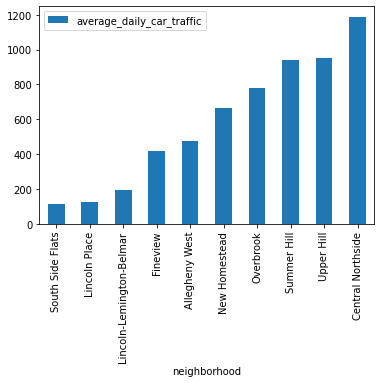

In [24]:
neighborhood = neighborhood.groupby('neighborhood').mean() #Grouped values so only 1 of each neighborhood
neighborhood = neighborhood.sort_values(by=['average_daily_car_traffic']) #Sorted in ascending order
neighborhood.head(10).plot(kind='bar') #Creates bar graph of top 10 values

# Average speed

Found it was important to include average MPH's in neighborhoods, as this can change outcome of neighborhoods

In [25]:
hoodmph = df[['neighborhood','average_daily_car_traffic','speed_limit']] #add speed limit column
hoodmph= hoodmph.dropna() #drop unobtained values
hoodmph = hoodmph.groupby('neighborhood').mean() #grouped MPH into singular neighborhoods but averaging them
hoodmph = hoodmph.sort_values(by=['speed_limit']) #sorted in ascending order
hoodmph.head()

,average_daily_car_traffic,speed_limit
neighborhood,,
Hazelwood,1289.500000,20.000000
South Side Slopes,3778.142857,24.285714
Allegheny Center,2386.000000,25.000000
Manchester,2420.625000,25.000000
Marshall-Shadeland,757.250000,25.000000


Resorted by traffic to see if there was a difference in speed limit

In [26]:
hoodmph = hoodmph.sort_values(by=['average_daily_car_traffic'])
hoodmph.head()

,average_daily_car_traffic,speed_limit
neighborhood,,
South Side Flats,115.0,25.0
Lincoln Place,126.0,25.0
Lincoln-Lemington-Belmar,195.0,25.0
Fineview,419.0,25.0
Allegheny West,477.0,25.0


Bar graph visualization to show that speed did not make a difference

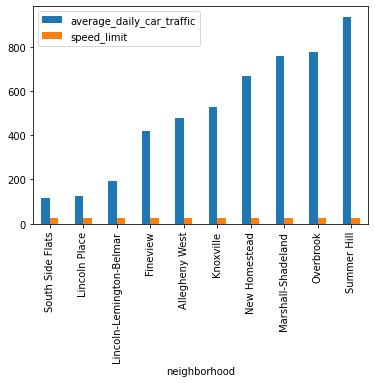

In [27]:
hoodmph.head(10).plot(kind='bar')

### Map Visualization

In order to get a better representation of the traffic count of all the neighborhoods, we use a map visualization to account for every neighborhood, instead of the 10 least traffic-dense neighborhoods.

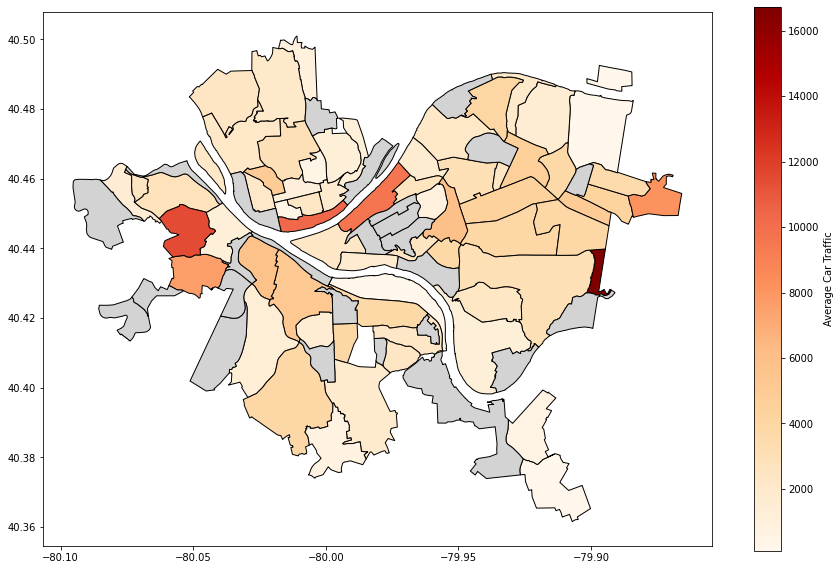

In [28]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile
map2 = neighborhoods.merge(neighborhood, how='left', left_on='hood', right_on='neighborhood')
map2.plot(column='average_daily_car_traffic', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Average Car Traffic"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Create Ratio Visualization

Since it's clear from the map to see that many of the large neighborhoods have a medium traffic count, so in order to get a better representation of the traffic in the neighborhoods, I imported a neighborhood size data set. By dividing the traffic count by the square miles of the neighborhoods, we are given a ratio to represent the traffic density in each neighborhood to give a better depiction of how much traffic you will actually see.

In [29]:
hoodSize = pd.read_csv("Neighborhoods_with_SNAP_Data.csv",index_col = False)
hoodSize=hoodSize[["Neighborhood_2010_SQMILES", "SNAP_All_csv_Neighborhood"]] #keep only the neighborhood and neighborhood size columns since there were dozens of others that were irrelevant.
hoodSize = hoodSize.rename(columns={"Neighborhood_2010_SQMILES":"sq_miles","SNAP_All_csv_Neighborhood":"neighborhood"})
hoodSize

,sq_miles,neighborhood
0,0.281,Central Oakland
1,0.499,North Oakland
2,0.215,West Oakland
3,0.258,Crawford-Roberts
4,0.608,Strip District
...,...,...
85,0.132,Chartiers City
86,0.369,Ridgemont
87,0.200,West End
88,0.217,California-Kirkbride


In [30]:
combinedDf = pd.merge(neighborhood, hoodSize, on='neighborhood') #Merged both datasets
combinedDf

,neighborhood,average_daily_car_traffic,sq_miles
0,South Side Flats,115.000000,0.936
1,Lincoln Place,126.000000,0.984
2,Lincoln-Lemington-Belmar,195.000000,0.280
3,Fineview,419.000000,0.250
4,Allegheny West,477.000000,0.141
...,...,...,...
59,East Hills,8126.500000,0.541
60,Strip District,9691.666667,0.608
61,North Shore,10350.000000,0.303
62,Crafton Heights,11500.000000,0.754


In [31]:
# Created ratio column to find density of traffic
combinedDf['ratio'] = combinedDf['average_daily_car_traffic'] / combinedDf['sq_miles']
#Sorted dataset by ratio in ascending order
combinedDf = combinedDf.sort_values(by=['ratio'])
#print top 10 values
combinedDf.head(10)

,neighborhood,average_daily_car_traffic,sq_miles,ratio
0,South Side Flats,115.000000,0.936,122.863248
1,Lincoln Place,126.000000,0.984,128.048780
2,Lincoln-Lemington-Belmar,195.000000,0.280,696.428571
11,Hazelwood,1289.500000,1.583,814.592546
5,New Homestead,666.000000,0.794,838.790932
6,Overbrook,777.000000,0.839,926.102503
14,Beechview,1418.333333,1.460,971.461187
39,Squirrel Hill South,3050.076923,2.671,1141.923221
21,Carrick,1969.571429,1.673,1177.269234
16,Highland Park,1564.733333,1.163,1345.428490


In [32]:
# Sort dataset into only neighborhood and ratio
combinedDf = combinedDf[['neighborhood','ratio']]
combinedDf

,neighborhood,ratio
0,South Side Flats,122.863248
1,Lincoln Place,128.048780
2,Lincoln-Lemington-Belmar,696.428571
11,Hazelwood,814.592546
5,New Homestead,838.790932
...,...,...
34,Chartiers City,19477.272727
54,California-Kirkbride,22927.803379
32,Friendship,23051.886792
61,North Shore,34158.415842


In [33]:
#Set neighborhood to index in order to graph data easier
combinedDf.set_index('neighborhood',inplace=True)

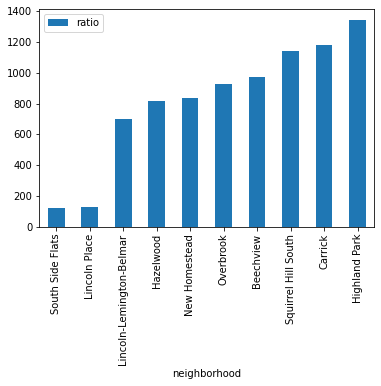

In [34]:
#Create bargraph to visualize results
combinedDf.head(10).plot(kind='bar')

### Ratio Map Visualization

In order to get a better representation of the new traffic density of all the neighborhoods, we use a map visualization to account for every neighborhood and to see a more updated traffic count map, so we know the likelihood of finding traffic.

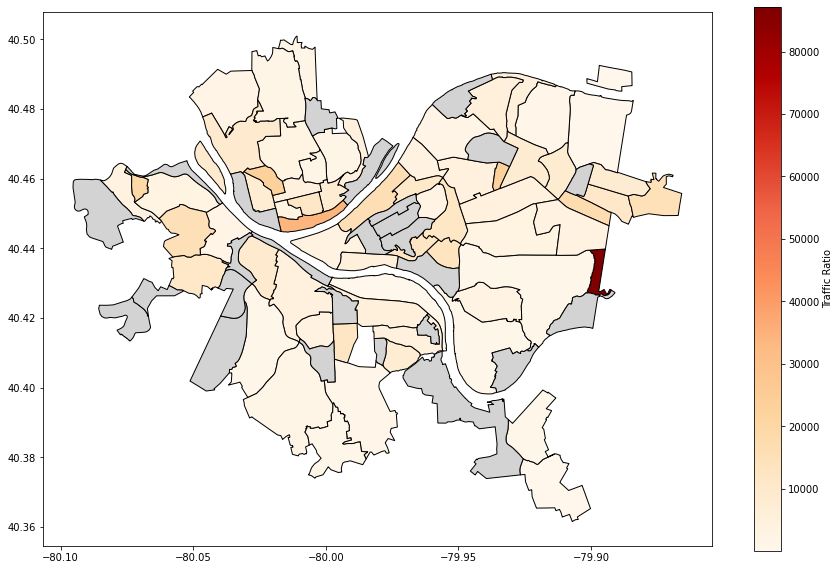

In [35]:
finalmap = neighborhoods.merge(combinedDf, how='left', left_on='hood', right_on='neighborhood')
finalmap.plot(column='ratio', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Traffic Ratio"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


## Conclusion

Based on the bar graphs showing us the numerical values of which neighborhoods have the least traffic density, and the heat maps to further those claims it is clear which neighborhoods are the safest to bike in based on how dense the traffic is in the neighborhoods.

1. South Side Flats
2. Lincoln Place
3. Lincoln-Lemington-Belmar
4. Hazelwood
5. New Homestead

When biking, the most dangerous thing isn't riding the bike, it's the other drivers around you being negligent in their surroundings. The best way to avoid that is to ride in safer neighborhoods with a low amount of traffic, and this data shows you where to go.

### My conclusion in the final notebook keeps getting cut off in github so here is the full version of it

__Neil Pandey:__ After we got the results for the best places for biking, I was fairly pleased to see a lot of the neighborhoods that I've come to enjoy in Pittsburgh at the top of the list. Places like South Side, Squirrel Hill South, and Shadyside are all places that I already go biking, so before we got the results, I was hoping to see them as possible outcomes for the best neighborhood for biking in Pittsburgh. It was interesting to see how the results would be calculated, as we had to combine metrics and find a middle-ground, so just because a neighborhood was at the top of the list for one metric, did not necessarily mean the same for the others. So neighborhoods like Shadyside with a high traffic rate still end up being at the top of the list.